In [1]:
import pandas as pd
from pandas.errors import ParserError
import numpy as np

In [2]:
fic = pd.read_csv("C:/Python_Practice/Data_Science/scorm_tracking.csv", sep=';')

In [3]:
fic.shape

(27403, 13)

In [4]:
fic.head(5)

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,25/08/2016 17:22,25/08/2016 17:32,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,25/08/2016 17:27,02/11/2017 15:40,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,25/08/2016 17:27,27/10/2017 08:21,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,25/08/2016 17:29,30/11/2017 16:53,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,25/08/2016 17:30,02/11/2017 15:56,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0


In [5]:
fic.dtypes

id                   int64
actor               object
session_uuid        object
object_id           object
activity_type       object
progression        float64
score              float64
temps              float64
total_ecrans         int64
created             object
modified            object
learning_object     object
processed            int64
dtype: object

In [6]:
fic.columns

Index(['id', 'actor', 'session_uuid', 'object_id', 'activity_type',
       'progression', 'score', 'temps', 'total_ecrans', 'created', 'modified',
       'learning_object', 'processed'],
      dtype='object')

In [7]:
#fic.corr()

In [8]:
#fic[['id', 'progression', 'score', 'temps']].corr() 

In [9]:
#fic['session_uuid'].value_counts()

## 1. A partir du jeu de données original, créer:
- un Dataframe comportant tous les modules en précisant l’effectif des
apprenants, le nombre total de sessions, le score maximal, le score minimal,
le taux de réussite (pour les apprenants des scores > 50)

In [10]:
fic.score.max()

100.0

In [11]:
fic.score.min()

0.0

In [12]:
fic = pd.DataFrame(fic)
#fic['actor'].unique()
fic

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,25/08/2016 17:22,25/08/2016 17:32,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,25/08/2016 17:27,02/11/2017 15:40,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,25/08/2016 17:27,27/10/2017 08:21,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,25/08/2016 17:29,30/11/2017 16:53,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,25/08/2016 17:30,02/11/2017 15:56,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27398,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,691-reseau-developpement,lesson,1.0,0.0,48.0,17,13/12/2018 11:21,13/12/2018 11:22,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27399,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,691-reseau-developpement,lesson,1.0,0.0,5.0,17,13/12/2018 11:22,13/12/2018 11:22,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27400,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,724-but-du-module,lesson,1.0,0.0,18.0,1,13/12/2018 11:23,13/12/2018 11:23,"{""objectives"":[{""id"":""1_introduction"",""progres...",1
27401,245656,dtic@mobiletic.com,a871e8c1-c928-4faf-8cfb-e06f0dbb99bc,724-but-du-module,lesson,1.0,0.0,3.0,1,13/12/2018 11:23,13/12/2018 11:23,"{""objectives"":[{""id"":""1_introduction"",""progres...",1


In [13]:
fic.describe()

,id,progression,score,temps,total_ecrans,processed
count,27403.000000,27403.000000,27403.000000,27403.000000,27403.000000,27403.000000
mean,91853.107397,0.898095,35.751414,270.297303,9.041966,0.015619
std,74734.880477,0.243429,42.299056,1103.438528,5.188702,0.123997
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19065.500000,1.000000,0.000000,23.000000,5.000000,0.000000
50%,81385.000000,1.000000,0.000000,94.000000,8.000000,0.000000
75%,149283.000000,1.000000,80.000000,287.000000,12.000000,0.000000
max,245659.000000,1.000000,100.000000,112788.000000,19.000000,1.000000


object_id
632-le-hibou-grand-duc                             1
669-vallee-trient-finhaut-source-de-bien-etre      1
671-presentation                                 340
674-strategie-et-croissance                      327
677-affaires-medicales                           322
                                                ... 
824-nescens                                       12
825-die-dienstleistungen-f-r-den-patienten        61
826-i-servizi-ai-pazienti                         12
827-quiz                                          60
828-quiz                                          12
Name: actor, Length: 152, dtype: int64

In [14]:
#fic.isnull().sum()

In [15]:
## Calcul du nombre d'acteurs ##
nbre_actor = fic.groupby(["object_id"]).actor.unique().agg(len)
nbre_actor
#nbre_acteur = nbre_acteur.groupby(["object_id"]).agg({"nbre_acteur":['count']})

object_id
632-le-hibou-grand-duc                             1
669-vallee-trient-finhaut-source-de-bien-etre      1
671-presentation                                 340
674-strategie-et-croissance                      327
677-affaires-medicales                           322
                                                ... 
824-nescens                                       12
825-die-dienstleistungen-f-r-den-patienten        61
826-i-servizi-ai-pazienti                         12
827-quiz                                          60
828-quiz                                          12
Name: actor, Length: 152, dtype: int64

In [16]:
## Calcul du nombre de session ##
nbre_session = fic.groupby("object_id").session_uuid.agg([len])


In [17]:
## Calcul du score maximal et minimal ##
score_max_min = fic.groupby("object_id").score.agg([max, min])


In [18]:
## Concaténation par module du nbre d'acteurs, du nbre de session, et des scores max min
dev = pd.concat([nbre_actor, nbre_session, score_max_min], axis = 1)
dev.columns.values[0] = "nbre_actor"
dev.columns.values[1] = "nbre_session"
#dev.columns.values[2] = "score_max_min"
dev

,nbre_actor,nbre_session,max,min
object_id,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0
671-presentation,340,634,100.0,0.0
674-strategie-et-croissance,327,471,100.0,0.0
677-affaires-medicales,322,469,100.0,0.0
...,...,...,...,...
824-nescens,12,22,0.0,0.0
825-die-dienstleistungen-f-r-den-patienten,61,156,100.0,0.0
826-i-servizi-ai-pazienti,12,35,100.0,0.0


In [19]:
dev = dev.fillna(0)
dev

,nbre_actor,nbre_session,max,min
object_id,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0
671-presentation,340,634,100.0,0.0
674-strategie-et-croissance,327,471,100.0,0.0
677-affaires-medicales,322,469,100.0,0.0
...,...,...,...,...
824-nescens,12,22,0.0,0.0
825-die-dienstleistungen-f-r-den-patienten,61,156,100.0,0.0
826-i-servizi-ai-pazienti,12,35,100.0,0.0


In [62]:
succes = pd.Series(fic.loc[fic["score"]>=50].groupby("object_id").actor.nunique())
succes

object_id
671-presentation                              308
674-strategie-et-croissance                   298
677-affaires-medicales                        295
678-politique-et-cadre-legal                  247
681-corporate-marketing-et-communication      235
                                             ... 
822-les-services-aux-patients                  61
825-die-dienstleistungen-f-r-den-patienten     56
826-i-servizi-ai-pazienti                      10
827-quiz                                       50
828-quiz                                        7
Name: actor, Length: 86, dtype: int64

In [21]:
echec = fic.loc[fic["score"]<50].groupby("object_id").actor.nunique()
echec

object_id
632-le-hibou-grand-duc                            1
669-vallee-trient-finhaut-source-de-bien-etre     1
671-presentation                                 93
674-strategie-et-croissance                      67
677-affaires-medicales                           65
                                                 ..
824-nescens                                      12
825-die-dienstleistungen-f-r-den-patienten       26
826-i-servizi-ai-pazienti                         9
827-quiz                                         31
828-quiz                                         10
Name: actor, Length: 152, dtype: int64

In [22]:
dev["succes_rate"] = (succes/fic.groupby('object_id').actor.nunique())*100
dev.sort_values(['succes_rate'],ascending=[False],inplace=True)
dev

,nbre_actor,nbre_session,max,min,succes_rate
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
...,...,...,...,...,...
816-krankheits-und-unfallbedingte-abwesenheit,89,173,0.0,0.0,NaN
818-nescens,61,92,0.0,0.0,NaN
820-formation,58,71,0.0,0.0,NaN


In [23]:
Top10 = dev.head(10)
Top10

,nbre_actor,nbre_session,max,min,succes_rate
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
766-unbezahlter-urlaub,88,188,100.0,0.0,97.727273
765-urlaub,88,308,100.0,0.0,97.727273
729-salaire,129,255,100.0,0.0,97.674419
747-modification-des-rapports-de-travail,124,242,100.0,0.0,97.580645


# Un tableau 2D Numpy avec les données des 10 tops modules selon les tauxde réussites (Chaque ligne représente un module)

In [24]:
TAB_2D = Top10.to_numpy()
#TAB_2D = np.array([Top10])
TAB_2D

array([[123.        , 216.        , 100.        ,   0.        ,
         99.18699187],
       [124.        , 153.        , 100.        ,   0.        ,
         98.38709677],
       [ 59.        ,  68.        , 100.        ,   0.        ,
         98.30508475],
       [ 94.        , 233.        , 100.        ,   0.        ,
         97.87234043],
       [ 89.        , 242.        , 100.        ,   0.        ,
         97.75280899],
       [ 88.        , 188.        , 100.        ,   0.        ,
         97.72727273],
       [ 88.        , 308.        , 100.        ,   0.        ,
         97.72727273],
       [129.        , 255.        , 100.        ,   0.        ,
         97.6744186 ],
       [124.        , 242.        , 100.        ,   0.        ,
         97.58064516],
       [122.        , 270.        , 100.        ,   0.        ,
         96.72131148]])

# Pour le top module et le dernier:- créer un Dataframe avec les données résumées de chaque apprenants:nombre total de sessions, nombre total de temps, score, resultat final (de valeur 0 si score < 50 et 1 sinon)


In [25]:
top_module = dev.head(1)
top_module.index[0]

'752-etudes-de-cas-et-questions'

In [26]:
last_module = dev.tail(1)
last_module.index[0]

'824-nescens'

In [27]:
df = fic.loc[fic["object_id"] == last_module.index[0]].groupby("actor").agg({"session_uuid":"count", "temps":"sum", "score":"max"})
df["resultat_final"] = 0
df.loc[df["score"]>=50, "resultat_final"] = 1
df

,session_uuid,temps,score,resultat_final
actor,,,,
dtic@mobiletic.com,9,214.0,0.0,0
ga2018_2bq4@yopmail.com,1,411.0,0.0,0
ga2018_341q@yopmail.com,1,446.0,0.0,0
ga2018_6a2v@yopmail.com,1,6.0,0.0,0
ga2018_6ys9@yopmail.com,1,259.0,0.0,0
ga2018_8s3m@yopmail.com,1,43.0,0.0,0
ga2018_l70o@yopmail.com,1,77.0,0.0,0
ga2018_tlqd@yopmail.com,1,145.0,0.0,0
ga2018_x19w@yopmail.com,1,9.0,0.0,0


In [28]:
tf = fic.loc[fic["object_id"] == top_module.index[0]].groupby("actor").agg({"session_uuid":"count", "temps":"sum", "score":"max"})
tf['resultat_final'] = 0
tf.loc[tf["score"]>=50, "resultat_final"] = 1
tf

,session_uuid,temps,score,resultat_final
actor,,,,
dtic@mobiletic.com,4,1546.0,83.0,1
ga2018_05n7@yopmail.com,1,425.0,67.0,1
ga2018_096a@yopmail.com,4,481.0,100.0,1
ga2018_0buu@yopmail.com,1,236.0,67.0,1
ga2018_0hot@yopmail.com,1,449.0,67.0,1
...,...,...,...,...
ga2018_xovt@yopmail.com,1,316.0,50.0,1
ga2018_xsog@yopmail.com,1,380.0,83.0,1
ga2018_yap3@yopmail.com,1,686.0,100.0,1


# 2ème partie

In [29]:
## Pour les 10 top module:- représenter par une courbe ces derniers dans un même repère sur une figure unique.
## A chaque apprenant correspond un point dont l’abscisse est le temps en minutes de celui-ci. 
## L’ordonné est déterminé par son score maximum.
##- Un diagramme en bâton avec le taux de réussite de chaque module.

In [30]:
import matplotlib
import matplotlib.pyplot as plt

In [31]:
Top10_module = dev.head(10)
[index for index in Top10_module.index]
Top10_module

,nbre_actor,nbre_session,max,min,succes_rate
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
766-unbezahlter-urlaub,88,188,100.0,0.0,97.727273
765-urlaub,88,308,100.0,0.0,97.727273
729-salaire,129,255,100.0,0.0,97.674419
747-modification-des-rapports-de-travail,124,242,100.0,0.0,97.580645


In [32]:
def score_temps(val):
    gf = fic.loc[fic['object_id'] == val].groupby("actor").agg({"temps": 'sum', 'score' : ['max']})
    gf = pd.concat([gf.temps, gf.score], axis=1)
    gf.sort_values(by= ["sum"], inplace= True)
    gf = np.array(gf.to_numpy().T)
    temps = gf[0]
    score_max = gf[1]
    return gf[0], gf[1]


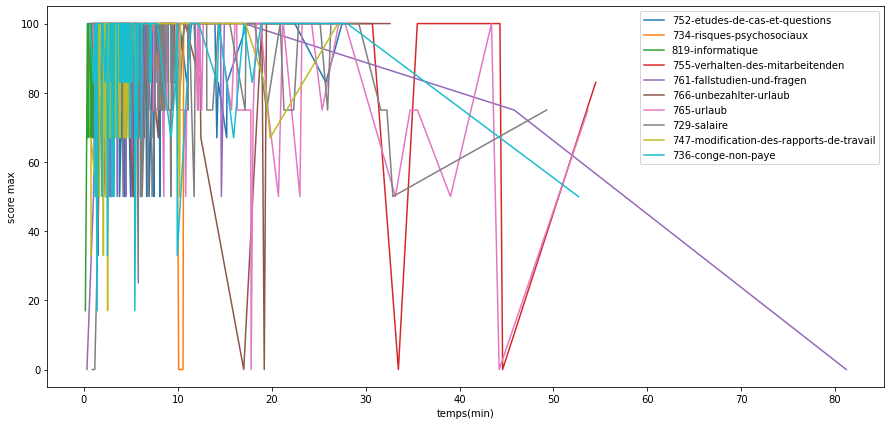

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
for index in Top10_module.index :
    x, y = score_temps(index)
    ax.plot(x/60, y, label=index)
    
ax.set_xlabel('temps(min)')
ax.set_ylabel('score max')
ax.legend();

In [34]:
serieNbActor = pd.Series(fic.groupby('object_id').actor.nunique()).rename('NbActor')
serieNbActor

object_id
632-le-hibou-grand-duc                             1
669-vallee-trient-finhaut-source-de-bien-etre      1
671-presentation                                 340
674-strategie-et-croissance                      327
677-affaires-medicales                           322
                                                ... 
824-nescens                                       12
825-die-dienstleistungen-f-r-den-patienten        61
826-i-servizi-ai-pazienti                         12
827-quiz                                          60
828-quiz                                          12
Name: NbActor, Length: 152, dtype: int64

In [35]:
Top3 = dev.head(3)
#Top3 = np.array(Top3)

In [36]:
Top3

,nbre_actor,nbre_session,max,min,succes_rate
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085


In [37]:
Top3.index[0]

'752-etudes-de-cas-et-questions'

<BarContainer object of 10 artists>

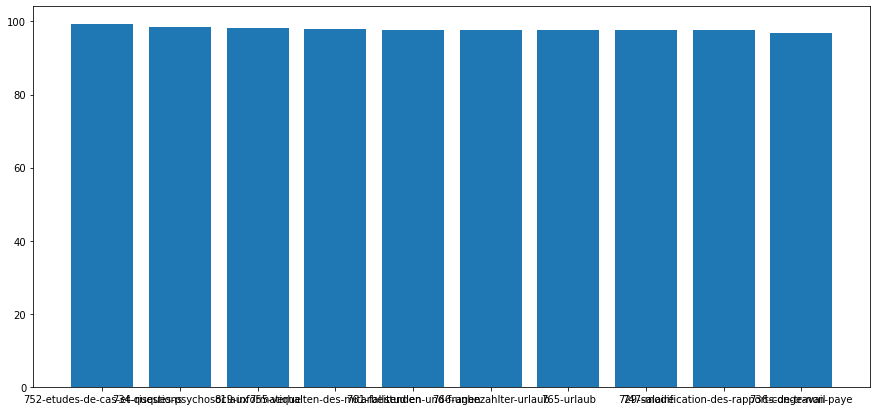

In [38]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(Top10_module.index, Top10_module.succes_rate)

In [39]:
##Pour les 3 top module:-représenter par une courbe chacun dans un même repère différent sur une
#même figure horizontalement subdivisée en trois. A chaque apprenant
##correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est
##déterminé par son score maximum.

In [40]:
def Top_a(fic, a, b, c, k):
    nbre = fic[(fic['object_id'] == a)].groupby('actor').score.max().rename('Nbre')
    f = pd.DataFrame({"sc": nbre})
    f = f.sort_values(by=['sc'], ascending=False)

    rg = list(range(1, len(f.sc)+1))
   
    plt.subplot(b, c, k)
    plt.plot(rg, f.sc,label=a)
    plt.legend()

Text(0, 0.5, 'score')

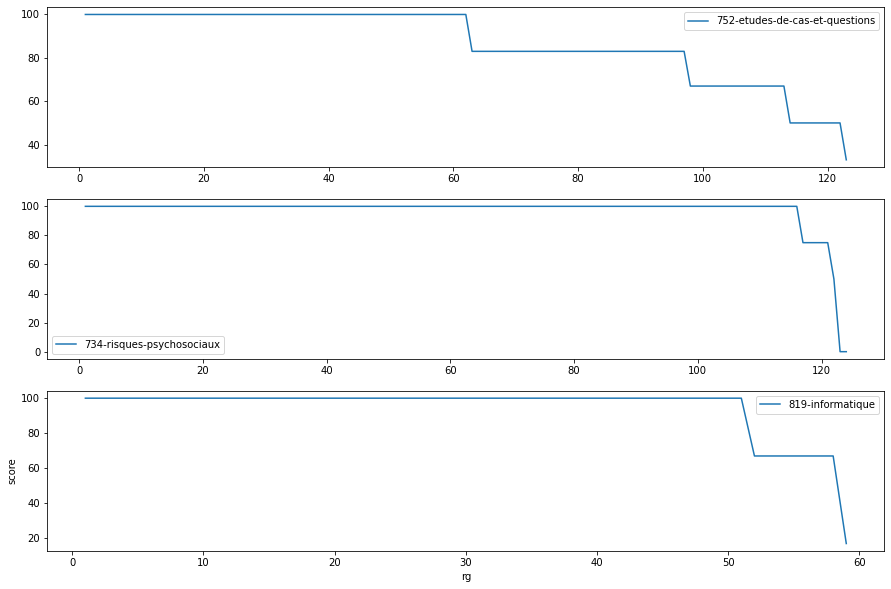

In [41]:
plt.figure(figsize=(15,10))
for i in range(3):
    Top_a(fic, Top3.index[i], 3, 1, i+1)
    
plt.xlabel('rg')
plt.ylabel('score')

In [42]:
# Pour tous les modules:
#- représenter l’ensemble par un nuage de points dans un même repère sur une
#même figure. A chaque apprenant correspond un point dont l’abscisse est le
#rang de celui-ci. L’ordonné est déterminé par le temps global sur le module.
#- Un camembert avec le taux des modules catégorisés en quatre classes:
#- Classe A: taux de réussite > = 80%
#- Classe B: taux de réussite > = 60%
#- Classe C: taux de réussite > = 50%
#- Classe D: taux de réussite < 50%

In [43]:
fic

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,25/08/2016 17:22,25/08/2016 17:32,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,25/08/2016 17:27,02/11/2017 15:40,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,25/08/2016 17:27,27/10/2017 08:21,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,25/08/2016 17:29,30/11/2017 16:53,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,25/08/2016 17:30,02/11/2017 15:56,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27398,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,691-reseau-developpement,lesson,1.0,0.0,48.0,17,13/12/2018 11:21,13/12/2018 11:22,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27399,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,691-reseau-developpement,lesson,1.0,0.0,5.0,17,13/12/2018 11:22,13/12/2018 11:22,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27400,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,724-but-du-module,lesson,1.0,0.0,18.0,1,13/12/2018 11:23,13/12/2018 11:23,"{""objectives"":[{""id"":""1_introduction"",""progres...",1
27401,245656,dtic@mobiletic.com,a871e8c1-c928-4faf-8cfb-e06f0dbb99bc,724-but-du-module,lesson,1.0,0.0,3.0,1,13/12/2018 11:23,13/12/2018 11:23,"{""objectives"":[{""id"":""1_introduction"",""progres...",1


In [44]:
dev['rg'] = list(range(1, len(dev.succes_rate)+1))
   

In [45]:
dev

,nbre_actor,nbre_session,max,min,succes_rate,rg
object_id,,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992,1
734-risques-psychosociaux,124,153,100.0,0.0,98.387097,2
819-informatique,59,68,100.0,0.0,98.305085,3
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340,4
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809,5
...,...,...,...,...,...,...
816-krankheits-und-unfallbedingte-abwesenheit,89,173,0.0,0.0,NaN,148
818-nescens,61,92,0.0,0.0,NaN,149
820-formation,58,71,0.0,0.0,NaN,150


In [46]:
def rg_temps(val):
    #gf = fic.loc[fic['object_id'] == val].groupby("actor").agg({"temps": 'sum'})
    gf = fic.groupby(["object_id"]).agg({"temps": "sum"})
    gf = pd.concat([dev.rg, gf.temps], axis=1)
    #gf.sort_values(by= ["sum"], inplace= True)
    gf = np.array(gf.to_numpy().T)
    rg = gf[0]
    temps = gf[1]
    return gf[0], gf[1]


Text(0, 0.5, 'temps global')

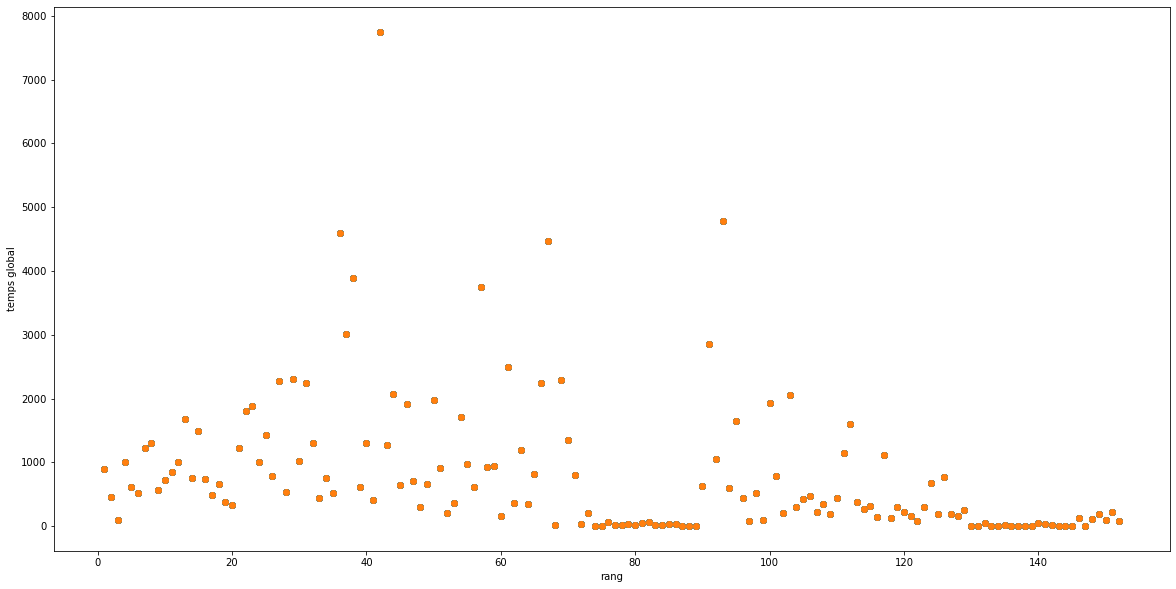

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
for index in dev.index :
    x, y = rg_temps(index)
    plt.scatter(x, y/60, label=index)
    
ax.set_xlabel('rang')
ax.set_ylabel('temps global')
#ax.legend();

In [48]:
call = dev.head(86)
call[call['succes_rate'] >= 80]

,nbre_actor,nbre_session,max,min,succes_rate,rg
object_id,,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992,1
734-risques-psychosociaux,124,153,100.0,0.0,98.387097,2
819-informatique,59,68,100.0,0.0,98.305085,3
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340,4
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809,5
...,...,...,...,...,...,...
827-quiz,60,283,100.0,0.0,83.333333,59
826-i-servizi-ai-pazienti,12,35,100.0,0.0,83.333333,60
682-les-services-aux-patients,250,343,100.0,0.0,82.800000,61


In [49]:
def taille():
    classeA = len(call[call['succes_rate'] >= 80])
    classeB = len(call[call['succes_rate'] >= 60])
    classeC = len(call[call['succes_rate'] >= 50])
    classeD = len(call[call['succes_rate'] < 60])
    sizes = [classeA, classeB, classeC, classeD]
    return sizes

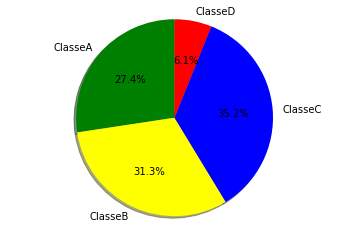

In [50]:
labels = 'ClasseA', 'ClasseB', 'ClasseC', 'ClasseD'
sizes = taille()
colors = ['green', 'yellow', 'blue', 'red']
explode = (0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow = True, startangle=90)

plt.axis('equal')

#plt.savefig('PieChart01.png')
plt.show()

In [51]:
##Classe
path = "C:/Python_Practice/Data_Science/scorm_tracking.csv"

In [69]:
class glob():
    
    def __init__(self, path):
        try:
            self.fic = pd.read_csv(path, sep=';')
        except:
            self.fic = pd.read_csv(path, sep=',')
            
    def All_data(self):
#Grouper les modules par nombre d'actor
        nbre_actor = pd.Series(self.fic.groupby(["object_id"]).actor.unique()).agg([len])
        nbre_session = pd.Series(self.fic.groupby("object_id").session_uuid).agg([len])
##Grouper les modules par score maximum et minimum
        succes = pd.Series(self.fic.loc[self.fic["score"]>=50].groupby("object_id").actor.nunique())
        echec = pd.Series(self.fic.loc[self.fic["score"]<50].groupby("object_id").actor.nunique()) 
        score_max_min = pd.Series(self.fic.groupby("object_id").score).agg([max, min])
## Concaténation par module du nbre d'acteurs, du nbre de session, et des scores max min
        dev = pd.concat([nbre_actor, nbre_session, score_max_min], axis = 1)
        dev.columns.values[0] = "nbre_actor"
        dev.columns.values[1] = "nbre_session"
        dev["succes_rate"] = (succes/self.fic.groupby('object_id').actor.nunique())*100
        dev.sort_values(['succes_rate'],ascending=[False],inplace=True)
        top_module = dev.head(1)
        last_module = dev.tail(1)
        df = self.fic.loc[self.fic["object_id"] == last_module.index[0]].groupby("actor").agg({"session_uuid":"count", "temps":"sum", "score":"max"})
        df["resultat_final"] = 0
        df.loc[df["score"]>=50, "resultat_final"] = 1
        
        tf = self.fic.loc[self.fic["object_id"] == top_module.index[0]].groupby("actor").agg({"session_uuid":"count", "temps":"sum", "score":"max"})
        tf['resultat_final'] = 0
        tf.loc[tf["score"]>=50, "resultat_final"] = 1
    def Top_mod(self, dev):
        self.All_data()
        resultatFinalTop10 = self.dev.head(10)
        return resultatFinalTop10
    
#import numpy as np

    def To_nump(self,Top10):
        
        resultatFinalTop10Numpy = Top10.to_numpy()
        return resultatFinalTop10Numpy
    
    def score_temps(self, fic, val):
        gf = self.fic.loc[self.fic['object_id'] == val].groupby("actor").agg({"temps": 'sum', 'score' : ['max']})
        gf = pd.concat([gf.temps, gf.score], axis=1)
        gf.sort_values(by= ["sum"], inplace= True)
        gf = np.array(gf.to_numpy().T)
        temps = gf[0]
        score_max = gf[1]
        return gf[0], gf[1]
    def Graph(self):
        fig, ax = plt.subplots(figsize=(15, 7))
        for index in Top10_module.index :
            x, y = score_temps(index)
            ax.plot(x/60, y, label=index)
        ax.set_xlabel('temps(min)')
        ax.set_ylabel('score max')
        ax.legend();
    def Top_a(self, fic, a, b, c, k):
        
        nbre = self.fic[(self.fic['object_id'] == a)].groupby('actor').score.max().rename('Nbre')
        f = pd.DataFrame({"sc": nbre})
        f = f.sort_values(by=['sc'], ascending=False)
        rg = list(range(1, len(f.sc)+1))
        plt.subplot(b, c, k)
        plt.plot(rg, f.sc,label=a)
        plt.legend()

    def rg_temps(self, val):
        #gf = fic.loc[fic['object_id'] == val].groupby("actor").agg({"temps": 'sum'})
        gf = self.fic.groupby(["object_id"]).agg({"temps": "sum"})
        gf = pd.concat([dev.rg, gf.temps], axis=1)
        #gf.sort_values(by= ["sum"], inplace= True)
        gf = np.array(gf.to_numpy().T)
        rg = gf[0]
        temps = gf[1]
        return gf[0], gf[1]
        
            
    def Graph_scat(self):
        
        fig, ax = plt.subplots(figsize=(20, 10))
        for index in dev.index :
            x, y = rg_temps(index)
            plt.scatter(x, y/60, label=index)
    
        ax.set_xlabel('rang')
        ax.set_ylabel('temps global')
        #ax.legend();
        
    def taille(self):
        self.All_data
        classeA = len(self.call[self.call['succes_rate'] >= 80])
        classeB = len(self.call[self.call['succes_rate'] >= 60])
        classeC = len(self.call[call['succes_rate'] >= 50])
        classeD = len(call[call['succes_rate'] < 60])
        sizes = [classeA, classeB, classeC, classeD]
        labels = 'ClasseA', 'ClasseB', 'ClasseC', 'ClasseD'
        lb = ['classeA','classeB','classeC','classeD']
        plt.pie(sizes, labels = labels, autopct='%1.2f%%')
  

In [70]:
d=glob('C:/Python_Practice/Data_Science/scorm_tracking.csv')
c = d.Top_mod(3)
t1= d.To_nump(Top10)
d.score_temps(Top10,-1)
d.taille()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v = np.array(v, copy=False)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1623: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  subarr = np.array(values, dtype=dtype, copy=copy)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes)

AttributeError: 'glob' object has no attribute 'dev'